In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
train_data = pd.read_csv('G:\\Fashion\\fashion-mnist_train.csv')

In [4]:
test_data = pd.read_csv('G:\\Fashion\\fashion-mnist_test.csv')

In [5]:
test_data.shape

(10000, 785)

In [6]:
train_data.shape

(60000, 785)

In [7]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train_pixels = train_data.drop(['label'],axis=1)
test_pixels = test_data.drop(['label'],axis=1)

In [9]:
train_pixels.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans_model_train = kmeans.fit(train_pixels)
clusters = kmeans_model_train.predict(test_pixels)
kmeans_model_train.cluster_centers_.shape

(10, 784)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

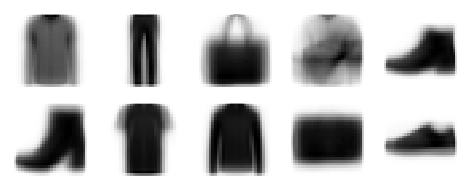

In [12]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [13]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(test_data["label"][mask])[0]

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(test_data["label"], labels)

0.552

In [15]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
train_pixel_proj = tsne.fit_transform(train_pixels)
test_pixel_proj = tsne.fit_transform(test_pixels)


In [16]:
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans_model_train = kmeans.fit(train_pixel_proj)
clusters = kmeans_model_train.predict(test_pixel_proj)
kmeans_model_train.cluster_centers_.shape

(10, 2)

In [17]:
labels_proj = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels_proj[mask] = mode(test_data["label"][mask])[0]

In [19]:
# Compute the accuracy
accuracy_score(test_data["label"], labels_proj)

0.5924

In [21]:
import numpy as np # linear algebra
import seaborn as sns
import matplotlib
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA#, RandomizedPCA
from sklearn.manifold import TSNE

sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'

ready


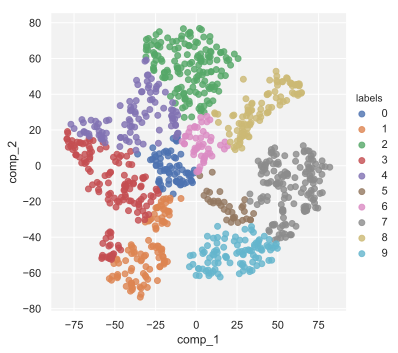

In [23]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(test_pixel_proj)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = labels_proj
sns.lmplot("comp_1", "comp_2", hue = "labels", data = proj.sample(1000) ,fit_reg=False)
print("ready")